In [40]:
import random
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [48]:
NODES = 6
GOAL = 4

ALPHA = 0.02
GAMMA = 0.85
EXPLORE_PROB = 1.0

In [49]:
R = {
(0, 1): 0,
(0, 2): 0,
(0, 5): -4,
(1, 0): -1,
(1, 2): 5,
(1, 3): 2,
(1, 5): 0,
(2, 0): -5,
(2, 1): 0,
(2, 3): 10,
(2, 5): 8,
(3, 0): 5,
(3, 1): -3,
(3, 2): 4,
(3, 4): 50,
(3, 5): 2,
(4, 0): -10,
(4, 1): -5,
(4, 2): -20,
(4, 3): 0,
(4, 4): 100,
(4, 5): -50,
(5, 0): -15,
(5, 1): 2,
(5, 2): -7,
(5, 3): 0,
(5, 4): 70,
}

Q = {}

In [50]:
def get_actions(current): #current node
    actions = [] #next possible nodes
    for rx in xrange(NODES): 
        if (current, rx) in R: #R is the reward dictionary
            actions.append(rx) #append the action
    return actions

get_actions(0)

[1, 2, 5]

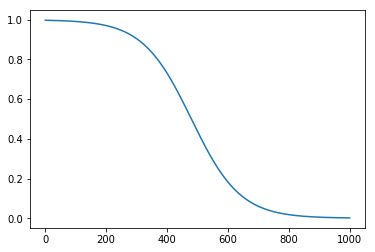

In [51]:
#to control the eplison value decay thevalue of epsilon non linearly
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z)) #we removed the minus sign inorder to flip the graph wrt vertical axis

#to generate random values for sigmoid
def decay(t, total_iter=100, initial_value=None): #current value
    z=(t/(0.08 * total_iter))
    return sigmoid(z*-1+6) #plus 5 inorder to shift the axis

val = []
N = 1000
for ix in np.linspace(0, N, 200):
    #his is the ranom probability 
    val.append(decay(ix, N, 1.0))
    
plt.plot(np.linspace(0, N, 200), val)



In [67]:
N_ep = 5000 #number fo episodes or number of epox
EXPLORE = True #if you want to train it or not
display_path = False #tells if you want to print the training path
all_rewards = [] #maintains the record of overall rewards
for ep in range(N_ep):
    pos = 0 #current position
    rew = 0 #curr reward
    steps = 0 #step count
    #run time condiition if we want to print this path or not
    if display_path:
        print pos
        ,
    while (not pos == GOAL) and steps < 10:
    # for kx in range(20):        # print pos
        steps += 1
        p_act = get_actions(pos)  #possible actions
        
        best = [] #best action as there can be same q values for more than one action and state pair
        q_best = None #q value
        
        for ac in p_act:
             #we store the actions here as we are to find the next state usign this action 
            rq = Q.setdefault((pos, ac), 0) #returns the weight of the pos and c key if existselse make the new key and return the valure 0
            if rq > q_best:
                q_best = rq
                best = [ac]
            elif rq == q_best:
                best.append(ac)
        
        # define exploration
        explore_prob = decay(ep, N_ep, EXPLORE_PROB)
        
        if np.random.random() < explore_prob and EXPLORE:
            nxt_pos = random.choice(p_act)
        else:
            nxt_pos = random.choice(best)
        if display_path:
            print nxt_pos,
        nxt_p_ac = get_actions(nxt_pos)
        
        nq_best = None
        
        for ac in nxt_p_ac:
            #we didnot store the actions here as we are not to find the next state usign this action 
            rq = Q.setdefault((nxt_pos, ac), 0)
            nq_best = max(nq_best, rq)
        
        Q[(pos, nxt_pos)] = (1- ALPHA)*Q[(pos, nxt_pos)] + ALPHA*(R[(pos, nxt_pos)] + GAMMA*nq_best)
        rew += R[(pos, nxt_pos)]
        pos = nxt_pos
    if display_path:
        print "\nEpisode:", ep, "| Reward:", rew
    all_rewards.append(rew)

In [68]:
for ax in range(NODES):
    for bx in range(NODES):
        if (ax, bx) in Q:
            print (ax, bx), Q[(ax, bx)]

(0, 1) 53.01875
(0, 2) 57.375
(0, 5) 55.5
(1, 0) 47.76875
(1, 2) 62.375
(1, 3) 54.275
(1, 5) 59.5
(2, 0) 43.76875
(2, 1) 53.01875
(2, 3) 62.275
(2, 5) 67.5
(3, 0) 53.76875
(3, 1) 50.01875
(3, 2) 61.375
(3, 4) 50.0
(3, 5) 61.5
(4, 0) 0
(4, 1) 0
(4, 2) 0
(4, 3) 0
(4, 4) 0
(4, 5) 0
(5, 0) 33.76875
(5, 1) 55.01875
(5, 2) 50.375
(5, 3) 52.275
(5, 4) 70.0


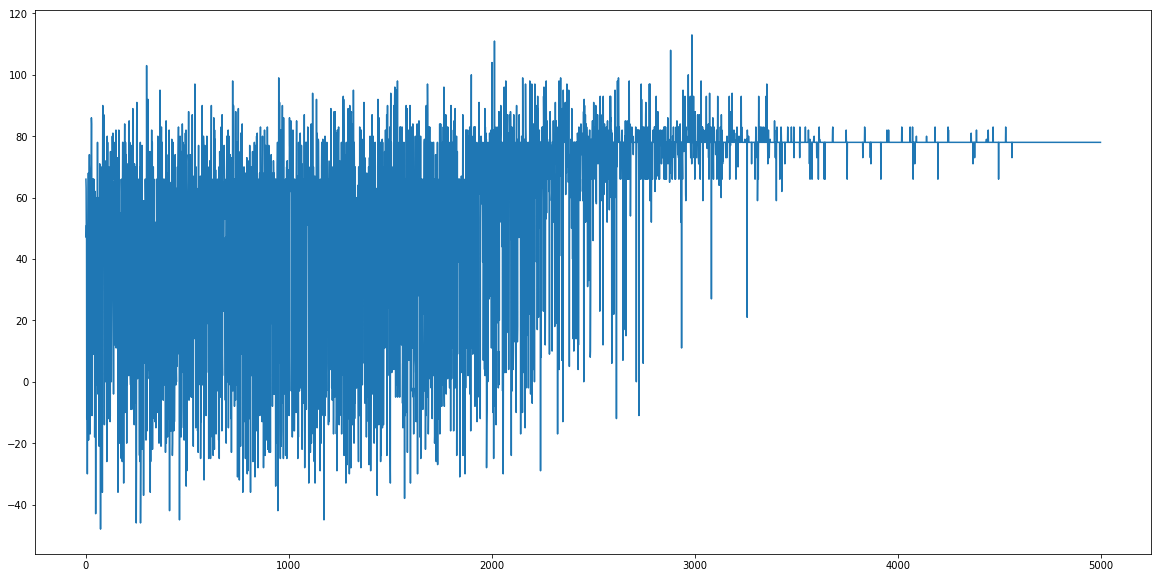

In [69]:
plt.figure(0, figsize=(20, 10))

plt.plot(all_rewards)
plt.show()